## Import Dependencies


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pytesseract
import os
import imutils

%matplotlib inline

## Helper Show Method

In [2]:
def show(img, figsize=(10, 10), title=None):
    figure = plt.figure(figsize=figsize)
    if title is not None:
        plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap="gray")
    plt.show()

## Helper Cropping/Segementing Method
A method to do Contour extraction and then send the possible segmenting rows/cols.

In [20]:
def crop_image(gray):
    # gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # show(img)
    bimg = cv2.GaussianBlur(gray, (5, 5), 0)
    timg = cv2.threshold(bimg, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
    # show(timg)
    cnts,_ = cv2.findContours(timg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts=sorted(cnts, key=cv2.contourArea)[::-1]
    # print(cnts)
    segments=[]
    bbs = []
    for cnt in cnts:
        x,y,w,h=cv2.boundingRect(cnt)
        bbs.append((x, y, w, h))
        #timg = cv2.rectangle(timg, (x, y), (x+w, y+h), 0, 3)
        show(timg[y:y+h, x:x+w])
        segments.append(gray[y:y+h, x:x+w])
        show(cv2.rectangle(gray, (x,y), (x+w, y+h), 100, 3))
    return segments, bbs

## Helper Tesseract Method
A method to extract text from image. Uses Pytesseract.

In [ ]:
def tess(img, config = ('-l eng --oem 1 --psm 3')):
    # Run tesseract OCR on image
    text = pytesseract.image_to_string(img, config=config)
    return text

## For Book's Image
No cropping done because target is to extract from **Handwritten**.

In [ ]:
root = "Assets/"
sub_root = "book/"
for img_name in os.listdir(root+sub_root):
    img_name=root+sub_root+img_name
    img = cv2.imread(img_name)
    
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show(img)

    # Run tesseract OCR on image
    text = textess(gray, config=config)

    print(text)

# For Handwritten Images
Read images from directory and do one by one process of segmentation and detection. Write the detected text on respective files under some give directory.

test.jpg


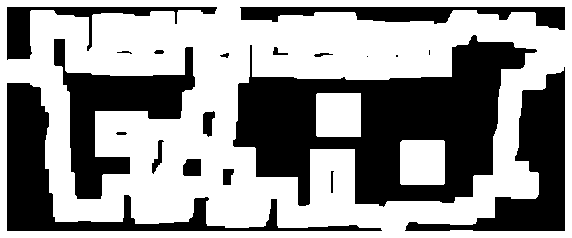

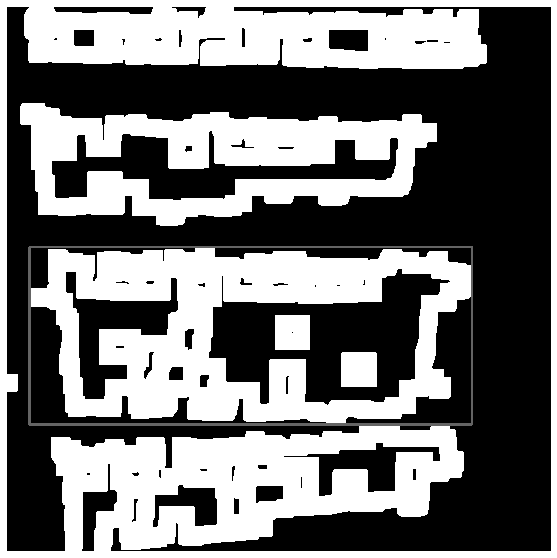

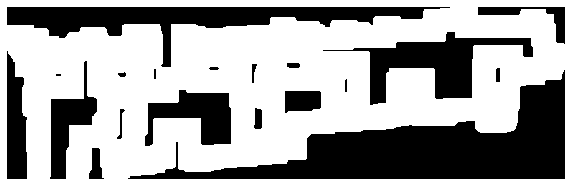

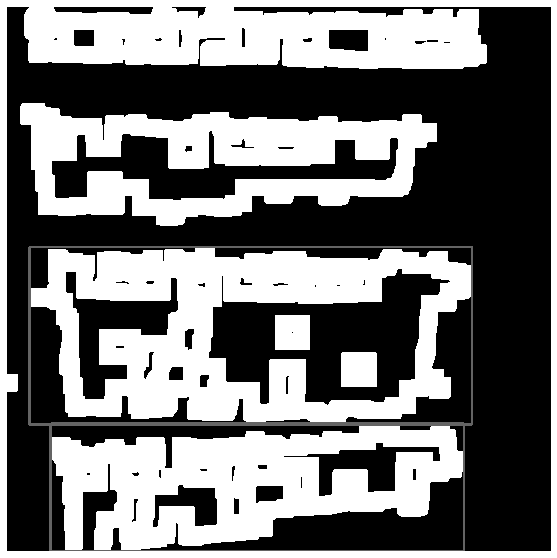

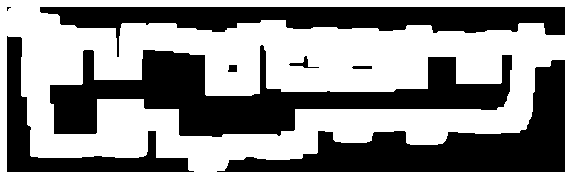

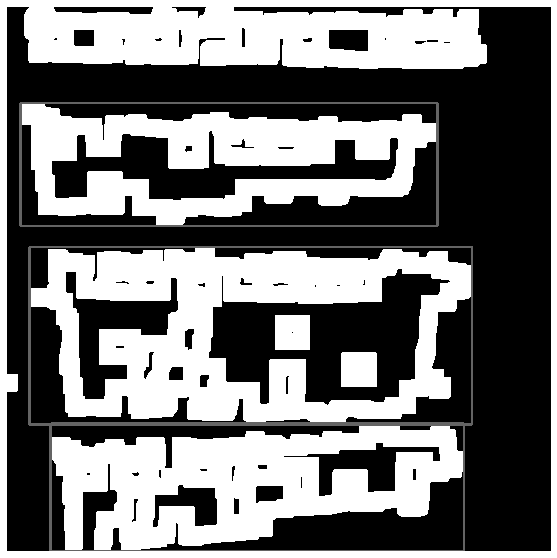

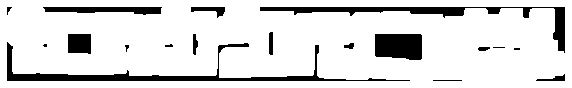

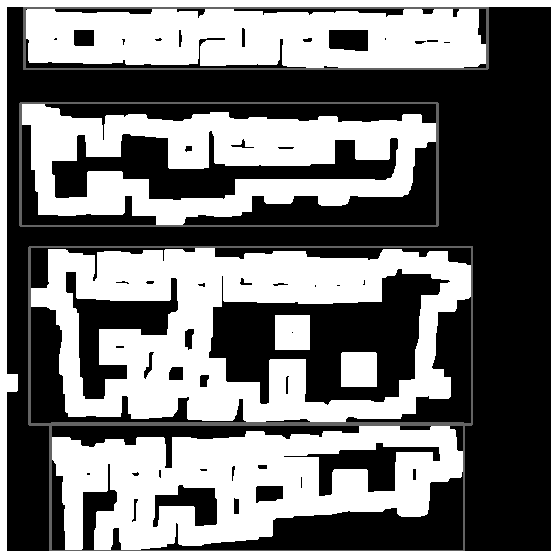

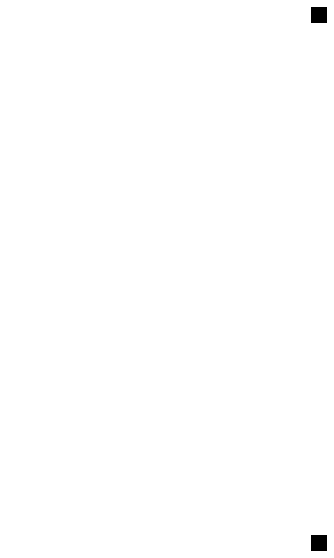

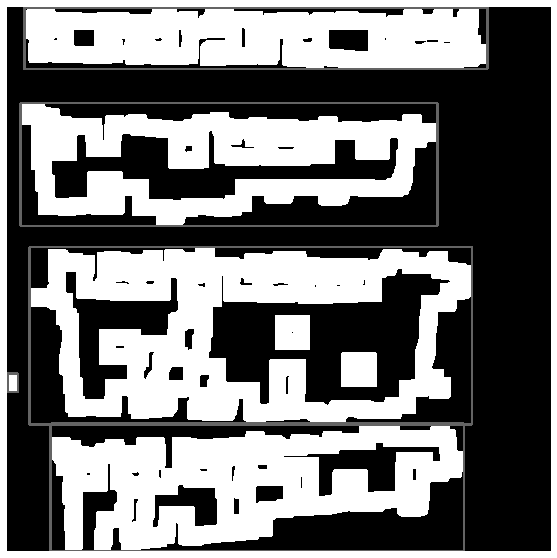

We liked hislony -Not becuse of history
- 15 wrdlen by inners, bat ue liked
do find tonal pas pieaknest se” (Bing
ever Eis! Tthought he was poe
because he was onthe side of
Ravana and IT wes on Ram's Side,
then Whe Wool eine PHssed -
You Should know when oulve did wocke
a eo. Non 4 asl me- The
Ontive a lidude Cra OMe CyaZ
By cle bottom - d
“Hussy up’ my sisky Se<éamed on xush-
Funes like the dude who got elect c
Shede- We were stéaling mangoes bat
lan dlaxd Caught us:
Once upon atime, these ums a Aug who had
A dream 4o side @ bane bot he never could-



In [36]:

root = "Assets/"
sub_root = "handwritten/"
tdir = "Extracted/"

for img_name in os.listdir(root+sub_root):
    print(img_name)
    full_name=root+sub_root+img_name
    img = cv2.imread(full_name)[:]
    ishape = img.shape
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray=cv2.resize(gray, (1024,1024))
    #show(gray)
    bimg=cv2.GaussianBlur(gray, (7, 7), 0)
    # show(bimg)
    
    # just perform some thresholding, add 
    _, gimg = cv2.threshold(bimg, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # show(th)
    #gimg = cv2.bilateralFilter(bimg, 13, 25, 25)
    #gimg = cv2.medianBlur(gimg, 5)
    
    # do some morphological operations to make block of text as block texture
    kernel=np.ones((33, 33), np.uint8)
    gimg=cv2.erode(gimg, kernel, iterations=1)
    gimg=cv2.dilate(gimg, kernel, iterations=1)
    gimg=cv2.morphologyEx(gimg, cv2.MORPH_GRADIENT, kernel) # blackhat, hitmiss
    # show(gimg)
    gimg = cv2.medianBlur(gimg, 3)
    # show(gimg)
    
    txt=[]
    with open(tdir+img_name.split(".")[0]+".txt", "w") as forp:
        pass
    segs, bbs=crop_image(gimg)
    for bb in bbs:
        x,y,w,h=bb
        simg=gray[y:y+h, x:x+w]
        #show(simg)
        
        # Configuration for tesseract
        config = ('-l eng --oem 3 --psm 6') #6, 1, 12
        # Run tesseract OCR on image
        text = tess(simg, config=config)
        print(text)
        with open(tdir+img_name.split(".")[0]+".txt", "a") as fp:
            fp.writelines(text)
 